
# Spam Detection using Machine Learning

This project aims to classify messages as **Spam** or **Ham (Not Spam)** using Natural Language Processing (NLP) techniques.  
We will use **TF-IDF vectorization** for feature extraction and compare multiple machine learning models.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
file_path = r"C:\Users\LENOVO\Downloads\archive (2)\spam.csv"
df = pd.read_csv(file_path, encoding="latin-1")

In [2]:
# Keep relevant columns
df = df.rename(columns={"v1": "label", "v2": "message"})
df = df[["label", "message"]]

In [3]:
# Convert labels to binary values: 'spam' -> 1, 'ham' -> 0
df["label"] = df["label"].map({"ham": 0, "spam": 1})

## Exploratory Data Analysis (EDA)

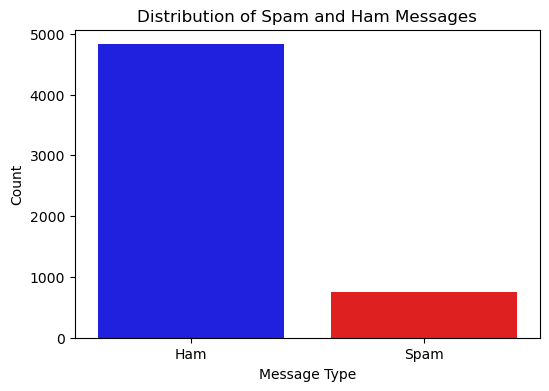

In [4]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["label"], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Ham", "Spam"])
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.title("Distribution of Spam and Ham Messages")
plt.show()

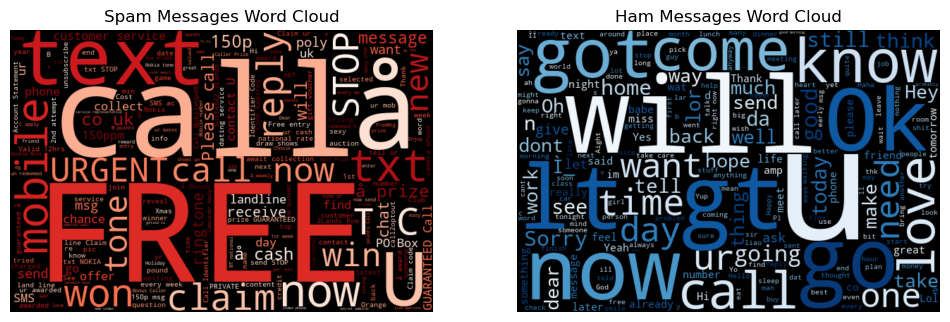

In [5]:
# Generate word clouds
spam_words = " ".join(df[df["label"] == 1]["message"])
ham_words = " ".join(df[df["label"] == 0]["message"])

spam_wordcloud = WordCloud(width=600, height=400, background_color="black", colormap="Reds").generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color="black", colormap="Blues").generate(ham_words)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].imshow(spam_wordcloud, interpolation="bilinear")
ax[0].set_title("Spam Messages Word Cloud")
ax[0].axis("off")

ax[1].imshow(ham_wordcloud, interpolation="bilinear")
ax[1].set_title("Ham Messages Word Cloud")
ax[1].axis("off")

plt.show()

In [6]:
# Define stopwords manually
manual_stopwords = set(["i", "me", "my", "we", "you", "your", "he", "she", "it", "they", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

In [7]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in manual_stopwords]
    return " ".join(words)

In [8]:
# Apply preprocessing
df["processed_message"] = df["message"].apply(preprocess_text)

## Feature Engineering: TF-IDF Vectorization

In [9]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["processed_message"])

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2, random_state=42)

In [11]:
# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

## Model Training & Comparison

In [13]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.9749
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 28 122]]


In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Support Vector Machine": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"### {name} ###")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

### Support Vector Machine ###
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


### Random Forest ###
Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115




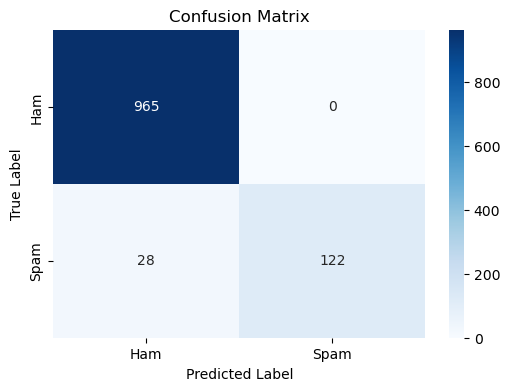

In [14]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Hyperparameter tuning using GridSearchCV for SVM
param_grid = {"C": [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel="linear", probability=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters for SVM:", grid_search.best_params_)

Best Parameters for SVM: {'C': 1}


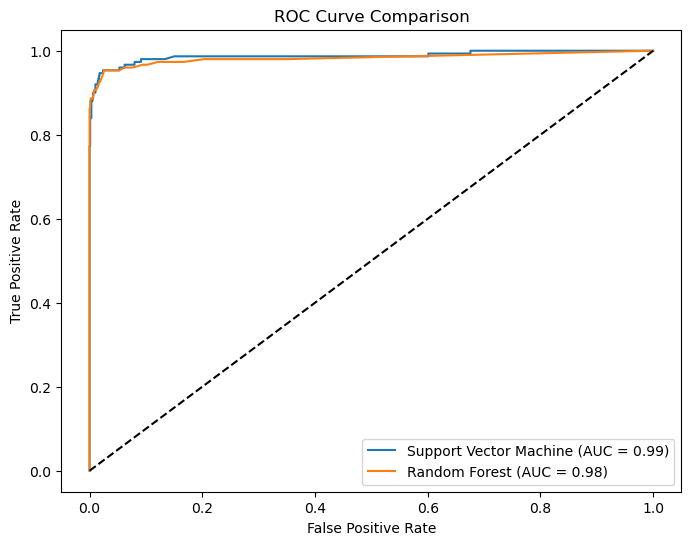

In [24]:
# Plot ROC Curve
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()